In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as matcoll
from scipy import stats
import seaborn as sb
import math

In [3]:
def createDirectory(dir:str):
    if not os.path.exists(dir):
        os.makedirs(dir)

In [4]:
def ecdf(xdata):
    xdataecdf = np.sort(xdata)
    ydataecdf = np.arange(1, len(xdata) + 1) / len(xdata)
    return xdataecdf,ydataecdf

In [5]:
def findMeanAndStd(xdata):
    xmean = np.mean(xdata)
    xstd = np.std(xdata)
    return xmean,xstd

In [6]:
def getCASimulationFolder(data, prefix='8e-06_3.2e-05', suffix=''):
    sample_name = f'Polycrystal_{data[0]}_{data[1]}x{data[1]}x{data[1]}'
    simulation_folder = f'/nethome/o.okewale/examples/{prefix}/sim_results_{suffix}/{sample_name}/{data[2]}_stand/CA_files'
    return simulation_folder

In [7]:
def gte(x,y):
    return x >= y
def lte(x,y):
    return x < y
def getRho(input_file, min_value=0, set_max=False):
    fn = gte if not set_max else lte
    with open(input_file) as f:
        lines = f.readlines()
        x_values = [float(line) for line in lines  if fn(float(line),min_value)]
    return x_values

In [8]:
def listMeanAndStd(data, time='0.0', start=1, end=5, prefix="8e-06_3.2e-05",min_rho=0, setMax=False):
    x_data = []
    y_data_std = []
    y_data_mean = []
    for index in range (start, end+1):
        x_data.append(index)
        input_file = f'{getCASimulationFolder(data, prefix=prefix, suffix=f"{index}")}/{time}/._rho.txt'
        rho = getRho(input_file,min_value=min_rho,set_max=setMax)
        mean,std = findMeanAndStd(rho)
        y_data_mean.append(mean)
        y_data_std.append(std)
    m_mean,m_std = findMeanAndStd(y_data_mean)
    s_mean,s_std = findMeanAndStd(y_data_std)
    return x_data,[y_data_mean,y_data_std],[m_mean/10**14,m_std/10**14],[s_mean/10**14, s_std/10**14]

In [9]:
for t in ['0.0','2.5','5.0']:
    x,y,z,a = listMeanAndStd([10,14,6000], time=t,start=1,end=1,prefix='4e-06_3.2e-05')
    x1,y1,z1,a1 = listMeanAndStd([98,30,6000], time=t,start=1,end=1,prefix='4e-06_3.2e-05')
    print(y[0][0]/10**14, y[1][0]/10**14, f"<== 10 grains [1-1] | time={t}")
    print(y1[0][0]/10**14, y1[1][0]/10**14, f"<== 98 grains [1-1] | time={t}")
    print("=======================================================")

4.335906852295918 1.3590794892396267 <== 10 grains [1-1] | time=0.0
4.374979168461049 1.503779511492152 <== 98 grains [1-1] | time=0.0
1.0003443919441501 1.7312904318831337 <== 10 grains [1-1] | time=2.5
1.1993645394122785 1.8578513915537247 <== 98 grains [1-1] | time=2.5
0.23960964165983087 0.7432147817145788 <== 10 grains [1-1] | time=5.0
0.480541304554588 1.1796174663339702 <== 98 grains [1-1] | time=5.0


In [28]:
def formatInp(inp):
    return f'{round(inp,5)}' if isinstance(inp, float) else f'{inp}'
def printLatexTableRow(*args):
    items = [formatInp(i) for i in args]
    print(" & ".join(items) + " \\\\")

In [32]:
minRho = 0 # 1.21e13
for t in ['0.0','2.5','5.0']:
    setMax = False # if t == '0.0' else True
    x,y,z,a = listMeanAndStd([10,7,6000], time=t,start=1,end=5,min_rho=minRho,setMax=setMax)
    x1,y1,z1,a1 = listMeanAndStd([98,15,6000], time=t,start=1,end=5,min_rho=minRho,setMax=setMax)
    x2,y2,z2,a2 = listMeanAndStd([310,22,6000], time=t,start=1,end=5,min_rho=minRho,setMax=setMax)
    x3,y3,z3,a3 = listMeanAndStd([512,26,6000], time=t,start=1,end=3,min_rho=minRho,setMax=setMax)
    x4,y4,z4,a4 = listMeanAndStd([955,32,6000], time=t,start=1,end=3,min_rho=minRho,setMax=setMax)

    print(f"$*mathbf<t = {t}*si<*s>>$ **".replace("*", "\\").replace("<", "{").replace(">", "}"))
    print("\hline")
    printLatexTableRow(10, z[1], z[1]/math.sqrt(5), a[1], a[1]/math.sqrt(5), 5)
    printLatexTableRow(98, z1[1], z1[1]/math.sqrt(5), a1[1], a1[1]/math.sqrt(5), 5)
    printLatexTableRow(310, z2[1], z2[1]/math.sqrt(5), a2[1], a2[1]/math.sqrt(5), 5)
    printLatexTableRow(512, z3[1], z3[1]/math.sqrt(3), a3[1], a3[1]/math.sqrt(3), 3)
    printLatexTableRow(955, z4[1], z4[1]/math.sqrt(3), a4[1], a4[1]/math.sqrt(3), 3)
    print("\hline")

$\mathbf{t = 0.0\si{\s}}$ \\
\hline
10 & 0.07051 & 0.03153 & 0.05657 & 0.0253 & 5 \\
98 & 0.02939 & 0.01314 & 0.01246 & 0.00557 & 5 \\
310 & 0.03505 & 0.01567 & 0.01821 & 0.00814 & 5 \\
512 & 0.01834 & 0.01059 & 0.00964 & 0.00557 & 3 \\
955 & 0.00551 & 0.00318 & 0.00767 & 0.00443 & 3 \\
\hline
$\mathbf{t = 2.5\si{\s}}$ \\
\hline
10 & 0.31111 & 0.13913 & 0.11897 & 0.05321 & 5 \\
98 & 0.06929 & 0.03099 & 0.02799 & 0.01252 & 5 \\
310 & 0.06422 & 0.02872 & 0.02508 & 0.01122 & 5 \\
512 & 0.04892 & 0.02825 & 0.01751 & 0.01011 & 3 \\
955 & 0.04996 & 0.02885 & 0.00784 & 0.00453 & 3 \\
\hline
$\mathbf{t = 5.0\si{\s}}$ \\
\hline
10 & 0.16498 & 0.07378 & 0.37114 & 0.16598 & 5 \\
98 & 0.0457 & 0.02044 & 0.08674 & 0.03879 & 5 \\
310 & 0.05461 & 0.02442 & 0.09523 & 0.04259 & 5 \\
512 & 0.02578 & 0.01489 & 0.05249 & 0.03031 & 3 \\
955 & 0.02841 & 0.0164 & 0.04557 & 0.02631 & 3 \\
\hline


In [15]:
def plotMean(allData, time='0.0'):
    x_data = [n[0] for n in allData]
    y_data_std = []
    y_data_mean = []
    for data in allData:
        base_file = getCASimulationFolder(data, suffix='1')
        input_file = f'{base_file}/{time}/._rho.txt'
        rho = getRho(input_file)
        mean,std = findMeanAndStd(rho)
        y_data_mean.append(mean)
        y_data_std.append(std)
    return x_data,[y_data_mean,y_data_std]

In [28]:
def plotECDF(data):
    # data = [98,15,6000]
    # sample_name = f'Polycrystal_{data[0]}_{data[1]}x{data[1]}x{data[1]}'
    # simulation_folder = f'/nethome/o.okewale/examples/sim_results/{sample_name}/{data[2]}_stand/CA_files'
    # sel_seconds = ['0.0','2.5','5.0']
    sel_seconds = ['2.5']
    plt.figure()
    for sec in sel_seconds:
        base_file = getCASimulationFolder(data, suffix='1')
        input_file = f'{base_file}/{sec}/._rho.txt'
        
        # # pandas and seaborn implementation.
        # x_values = pd.read_csv(input_file, names=['tot_density'])
        # plt_data = x_values.loc[x_values['tot_density']>1.21e13]
        # print(len(x_values['tot_density']), len(plt_data), "<== Length")
        # print(min(x_values['tot_density']), "<== Minimum data")
        # sb.ecdfplot(data=plt_data)
        
        # seaborn and my data loading implementation
        x_values = getRho(input_file)
        # get unrecrystallized values x > 1.21e13
        unr_x_values = [i for i in x_values if i > 1.21e13]
        print(len(x_values), len(unr_x_values), "<== Length")
        print(min(x_values), "<== Minimum data")
        sb.ecdfplot(data=unr_x_values)
        plt.xscale('log', base=10)
        # return

        # x,y = ecdf(x_values)
        # #Plot the data
        # # plt.figure()
        # plt.plot(x, y) # , marker='.', linestyle='none'
        # plt.xlabel('Dislocation density $\\rho$')
        # plt.legend(sel_seconds)
        # plt.ylabel('ECDF')
        # plt.margins(0.1)

In [17]:
def plotStandardDev(allData):
    x,y = plotMean(allData, time='5.0')
    x1,y1 = plotMean(allData, time='0.0')
    # x2,y2 = plotMean(allData, time='2.5')
    print(x)
    print(y[1])

    y_diff = [y1[1][i] - y[1][i] for i in range(0,len(y[1]))]
    y_avg = [np.average([y1[1][i],y[1][i]]) for i in range(0,len(y[1]))]
    y_coll = [[y1[1][i],y[1][i]] for i in range(0,len(y[1]))]
    print(y_diff)
    print(y_avg)
    print(y_coll, "<== Y Coll")
    str_x = [f'{a}' for a in x]
    x_coll = [[f'{a}',f'{a}'] for a in x]
    print(x_coll, "<== X Coll")

    # linecoll = matcoll.LineCollection(y_coll,colors='k')
    plt.figure()
    plt.plot(str_x, y_avg, marker='.', linestyle='-') # , marker='.', linestyle='none'
    plt.plot(str_x, y_coll, marker='.', linestyle='none')
    plt.legend(['avg','5.0s','0.0s'], title='Annealing time')
    plt.xlabel('grain no.')
    # plt.ylabel('$(\sigma_{5.0} + \sigma_{0.0})/2$')
    plt.ylabel('$\sigma$')
    plt.figure()
    plt.plot(str_x, y_diff, marker='.', linestyle='-') # , marker='.', linestyle='none'
    plt.xlabel('grain no.')
    plt.ylabel('$\sigma_{5.0} - \sigma_{0.0}$')
    plt.margins(0.1)

In [18]:
def doKSTest(data1, data2, time='0.0'):
    x_val1 = getRho(f'{getCASimulationFolder(data1)}/{time}/._rho.txt')
    x_val2 = getRho(f'{getCASimulationFolder(data2)}/{time}/._rho.txt')
    result = stats.ks_2samp(x_val1,x_val2)
    return result

50986 22140 <== Length
12000000212992.0 <== Minimum data


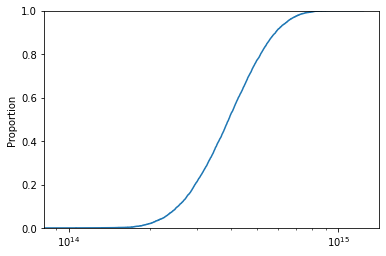

In [29]:
all_simulations = [
    [10,7,6000],
    [98,15,6000],
    [512,26,6000],
    [955,32,6000],
    [2160,42,6000],
]

# for dt in all_simulations:
#     plotECDF(dt)

plotECDF(all_simulations[2])
# plotStandardDev(all_simulations)
# print(doKSTest(all_simulations[4], all_simulations[3], time='0.0'))
# print(doKSTest(all_simulations[4], all_simulations[3], time='2.5'))
# print(doKSTest(all_simulations[4], all_simulations[3], time='0.0'))
# print(doKSTest(all_simulations[4], all_simulations[2], time='0.0'))
# print(doKSTest(all_simulations[4], all_simulations[1], time='0.0'))
# print(doKSTest(all_simulations[4], all_simulations[0], time='0.0'))

In [ ]:
def plotKSTest(allData, time_array):
    # This function assumes the last value is the one being compared to.
    output_folder = f'./plots/KSTest'
    createDirectory(output_folder)
    for time in time_array:
        x_data = [f'{allData[i][0]}' for i in range(0,len(allData)-1)]
        y_data = [doKSTest(allData[len(allData)-1], allData[s], time)[1] for s in range(0,len(allData)-1)]
        # print(x_data)
        # print(y_data)
        plt.figure()
        plt.plot(x_data, y_data, marker='.', linestyle='-') # , marker='.', linestyle='none'
        # plt.legend(['avg','5.0s','0.0s'], title='Annealing time')
        plt.xlabel('grain no.')
        plt.ylabel('p-value')
        plt.savefig(f'{output_folder}/{time}s_KSTest_on_dislocation_density.png', bbox_inches='tight')
    
times=[round(g,1) for g in np.arange(0.0,5.1,0.5)]
plotKSTest(all_simulations,time_array=times)
# print(times)